In [1]:
import pandas as pd
import json
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('data/cd-teste-ab-export.json') as data_file:    
    data = json.load(data_file)
    
data = data['logs']

resultados = list()

for key in data.keys():
    resultados.append(data[key])
    
data = pd.DataFrame(resultados)

data['user_id'] = data['user_id'].apply(pd.to_numeric)

data.head()

,projeto,tempo,tipo,user_id,versao
0,GDE,1478489225485,escolha_categoria,655675346,A
1,ModSim,1478488950831,inicio,655675346,A
2,GDE,1478487341466,inicio,655675346,A
3,GDE,1478488285362,final,655675346,B
4,ModSim,1478488266040,escolha_categoria,655675346,A


In [3]:
agrupado = data.groupby(by=["user_id", "versao"])

In [4]:
users = set(data.user_id)

In [5]:
users = list(users)

In [6]:
resultados = []

for u in users:
    for versao in ["A", "B"]:
        for proj in data[data.user_id ==  u].projeto:
            if (u, versao) in agrupado.groups.keys(): 
                grupo1 =  agrupado.get_group((u, versao))
                grupo1 = grupo1.sort_values(by="tempo") 

                if len(grupo1[grupo1.tipo=="final"])>= 1 and len(grupo1[grupo1.tipo=="inicio"]) >= 1 and len(grupo1[grupo1.tipo=="escolha_categoria"]) >= 1:
                    delta_t1 = grupo1[grupo1.tipo=="escolha_categoria"].iloc[-1].tempo - grupo1[grupo1.tipo=="inicio"].iloc[0].tempo
                    delta_t2 = grupo1[grupo1.tipo=="final"].iloc[-1].tempo - grupo1[grupo1.tipo=="escolha_categoria"].iloc[0].tempo
                    delta_t3 = grupo1[grupo1.tipo=="final"].iloc[-1].tempo - grupo1[grupo1.tipo=="inicio"].iloc[0].tempo
                    
                    resultados.append({"user_id":u, "delta_t_cat":delta_t1, "delta_t_final":delta_t2, "delta_t":delta_t3, "versao":versao, "projeto":proj})

In [7]:
grupo1.sort_values(by="tempo")
data = pd.DataFrame(resultados)

In [8]:
data.delta_t_cat/=1000
data.delta_t_final/=1000
data.delta_t/=1000
data.head()

,delta_t,delta_t_cat,delta_t_final,projeto,user_id,versao
0,3493.748,227543.37,3424.403,GDE,4122330881,A
1,3493.748,227543.37,3424.403,GDE,4122330881,A
2,3493.748,227543.37,3424.403,ModSim,4122330881,A
3,3493.748,227543.37,3424.403,ModSim,4122330881,A
4,3493.748,227543.37,3424.403,GDE,4122330881,A


In [9]:
A = data.delta_t_cat.dropna
B = data.delta_t_final.dropna
C = data.delta_t.dropna

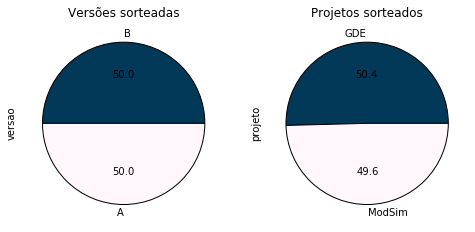

In [10]:
plt.subplot(221)
plt.title('Versões sorteadas')
data.versao.value_counts().plot(kind='pie', colormap='PuBu_r', autopct='%.1f', figsize=(8,8))

plt.subplot(222)
plt.title('Projetos sorteados')
data.projeto.value_counts().plot(kind='pie', colormap='PuBu_r', autopct='%.1f', figsize=(8,8))

plt.show()

TESTE T

In [11]:
vA = data[(data.versao == "A") & (data.delta_t < 3000)]
vB = data[(data.versao == "B") & (data.delta_t < 3000)]

In [12]:
#versão A
mu_T = vA.delta_t.mean()
s_T = vA.delta_t.var()

mu_cat = vA.delta_t_cat.mean()
s_cat = vA.delta_t_cat.var()

mu_f = vA.delta_t_final.mean()
s_f = vA.delta_t_final.var()

print("""Média (Delta T): {0}
Variância (Delta T): {1}

Média (Delta T Categoria-Inicial): {2}
Variância (Delta T Categoria-Inicial): {3}

Média (Delta T Final-Categoria): {4}
Variância (Delta T Final-Categoria): {5}""".format(mu_T, s_T, mu_cat, s_cat, mu_f, s_f))

Média (Delta T): 85.64616666666664
Variância (Delta T): 6088.737707459349

Média (Delta T Categoria-Inicial): 80.15895238095236
Variância (Delta T Categoria-Inicial): 5688.33152863182

Média (Delta T Final-Categoria): 21.17483333333333
Variância (Delta T Final-Categoria): 1029.0036415081308
